# 3D Modeling with Python

----
In This notebook we will attempt to create several 3D models of space objects. We will be doing this by examining images with python. We will also be using the github package [stl_tools](https://github.com/thearn/stl_tools) to take our fitted image arrays and convert them into 3D models. The 3D models we will create in this notebook are:

* **Eagle Nebula**
* **Mars Height Map**
* **Olympus Mons**
* **Valles Marineris**

---

In [1]:
# importing our packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.ndimage import gaussian_filter  

# modeling_scripts is a 
from modeling_scripts import *

# Path to the Raw Data
Path = '../Images/'

In [2]:
def norm(array):
    return((array- np.min(array))/(np.max(array)-np.min(array)))

def plot(image):
    plt.figure(figsize = [15,5])
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.colorbar(label='',spacing='proportional')
    plt.yticks([])
    plt.show()

### Eagle Nebula

Starting off by reading in the image we wish to plot for the Eagle Nebula

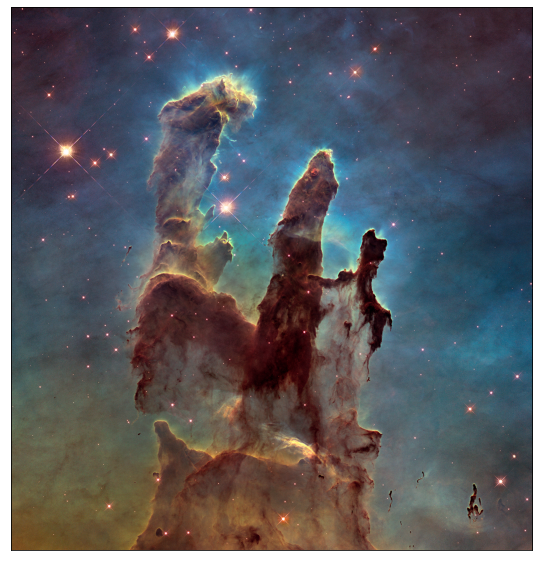

In [3]:
#Converting the PNG to an array
Nebula = imageio.imread(Path + 'Eagle_Nebula.jpeg')
#Nebula.show()

#Plotting the Image
plt.figure(figsize = [15,10])
plt.imshow(Nebula)
plt.xticks([])
plt.yticks([])
plt.show()

#### Now Making the 3D Model using `numpy2stl()`

In [37]:
# Inverting the image colors so the darker values are higher and the lighter values are lower
Nebula = -256 * Nebula

# Compose RGBA channels to give depth
Nebula = Nebula[:, :, 2] + 1*Nebula[:,:, 0]

# smoothing the image with a gaussian filter
Nebula = gaussian_filter(Nebula, 2)

#Making the 3D model
numpy2stl(Nebula, Path + '../Models/Eagle_Nebula.stl', max_width=400, scale=0.05, solid=True,
         min_thickness_percent=0.7)

Creating top mesh...
Computed edges...
Extending edges, creating bottom...


### Mars Height Map

We will now do the same steps for the Martian Height Map uncovered by the MOLA Mission.

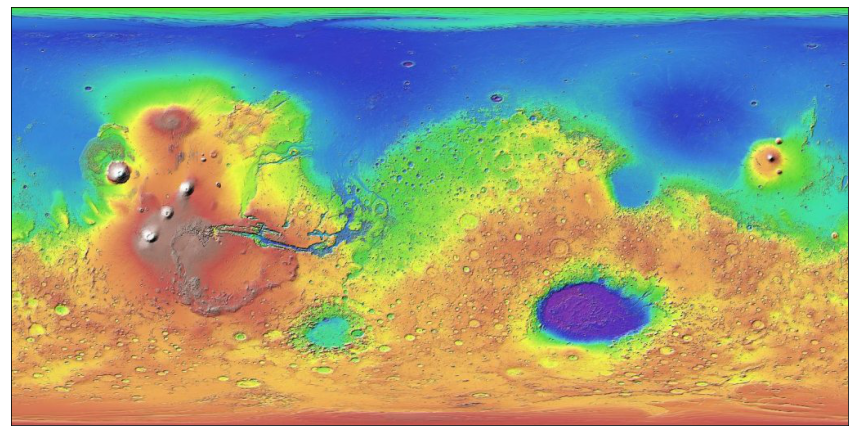

In [4]:
# our pathing
color_relief = 'mars_colored_shaded_relief.jpeg'

# reading the files into numpy arrays
color = imageio.imread(Path + color_relief)

#Plotting the Image
plt.figure(figsize = [15,10])
plt.imshow(color)
plt.xticks([])
plt.yticks([])
plt.show()

To easier view this data, we will be separating the red, green and blue filters and normilize the image

In [5]:
# normalizing each image
color = norm(color)

# dividing the image into red, green, and blue filters
color_r = color[:,:,0]
color_g = color[:,:,1]
color_b = color[:,:,2]

In [6]:
# The size of each color image
print('Each Color Image Size:',np.shape(color_r))

Each Color Image Size: (512, 1024)


***Note: The color bar to the right of the image relays the values we assigned the pixels from 0 to 1.***

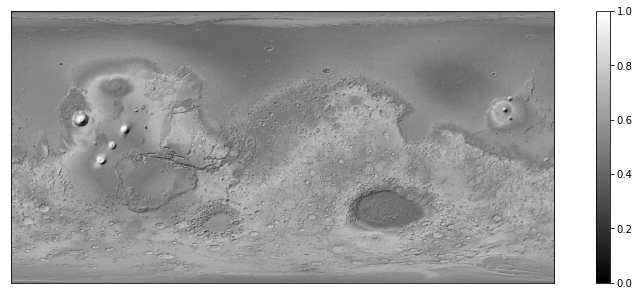

In [12]:
# adding the color images
color_full = norm(color_b+color_g+color_r)

plot(color_full)

#### Examining the Mountains
After further inspection, we notice that the mountains on the surface have some sort of "shadow" resulting in much smaller pixel values imediately after their summit. 

We believe this to be the cause of how NASA's MOLA satilite took data on mars. As the satilite orbited the planet, it was reciving bias from the side of the object it was facing, with an extreme example being shown at the mountiants

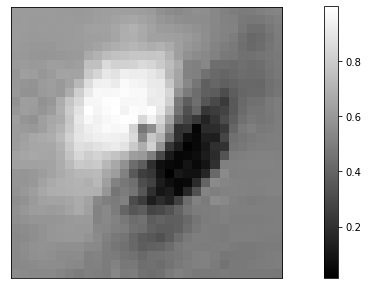

In [13]:
# Zooming in on a mountain example
mini = color_full[210:240,200:230]

plot(mini)

Breifly attempting to fix this bias by increasing the values of the dark regions with random values.

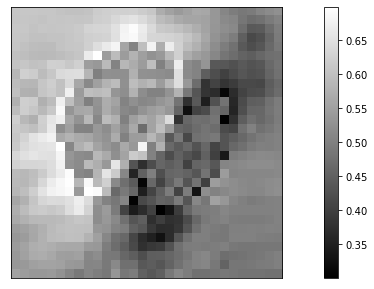

In [15]:
from scipy import ndimage

mini = color_full[210:240,200:230]

for i in range(len(mini)):
    for j in range(len(mini[i])):
        if(mini[i][j] <0.6 and mini[i][j] >0.3):
            pass
        if(mini[i][j] >=0.7):
            mini[i][j] = np.random.uniform(.5,.6)
        if(mini[i][j] <=0.3):
            mini[i][j] = np.random.uniform(.4,.5)

mini_med = gaussian_filter(norm(mini),2)

plot(mini)

We must note after our attempt that randomness under and above a designated pixel value does not work due to mars having a lot of values that deviate. Instead we will have to normalize our height map.

#### Using a normalized image for the Martian Surface

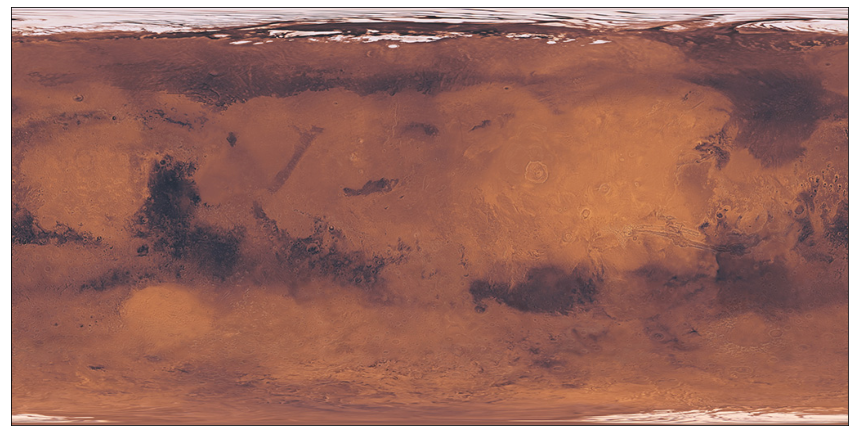

In [30]:
# our pathing
topography = 'mars_color.jpg'

# reading in each of the 3 files into numpy arrays
height = imageio.imread(Path + topography)

#Plotting the Image
plt.figure(figsize = [15,10])
plt.imshow(height)
plt.xticks([])
plt.yticks([])
plt.show()

Notice how compaired to the previous colored image that this data does not have any "shadows", this is good as it removes any bias that may have occured while collecting data.

In [31]:
# changing to the topography image
topo = 'mars_topography.jpg'

# reading the files into numpy arrays
height = imageio.imread(Path + topo)

# Smoothening the images        
h_map = gaussian_filter(height, 2)           

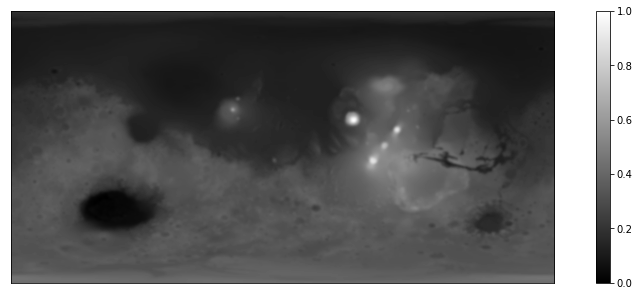

In [32]:
plot(norm(h_map))

#### Now Making a 3D Model of the height map using `numpy2stl()`

In [34]:
# Scaling up our image
height = h_map*3.1

# Creating the 3D Model
numpy2stl(height, Path+'../Models/Mars-Height-Map.stl', max_width=400,scale=0.05, solid=True)

Creating top mesh...
Computed edges...
Extending edges, creating bottom...


## Making models of interesting sections on Mars

Now that we have a working height map, we can crop our image into showing the sections we are interested in such as **Olympus Mons** and **Valles Marineris**

---

### Olympus Mons

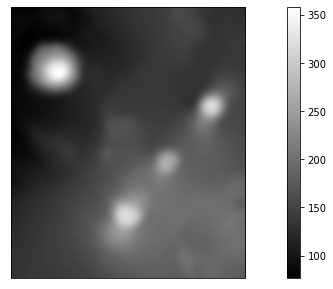

In [41]:
# Cropping Olympus Mons and the surounding volcanos
olympus = h_map[170:315,620:745]

# Scaling up our image
olympus = olympus*1.5

# showin our results
plot(olympus)

#### Now Making a 3D Model using `numpy2stl()`

In [ ]:
numpy2stl(olympus, Path+'../Models/Olympus-Mons.stl', max_width=400,scale=0.05, solid=True)

### Valles Marineris

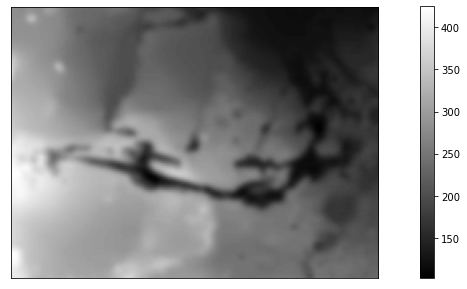

In [42]:
# Cropping the giant canyon
canyon = h_map[180:350,735:965]

# Scaling up our image
canyon = canyon*3.1

# showin our results
plot(canyon)

#### Now Making a 3D Model using `numpy2stl()`

In [ ]:
numpy2stl(canyon, Path+'../Models/Valles-Marineris.stl', max_width=400,scale=0.05, solid=True)

### We can also separate our Martian Height map into 4 separate models

The goal of this separation is to ensure any 3D printed will be large enough to make these models

In [43]:
# scaling up our image
scale = 3.1

# cropping the height map
h_map_fl = h_map[:,0:256] * scale            # far left
h_map_cl = h_map[:,256:256*2] * scale       # center left
h_map_cr = h_map[:,256*2:256*3] * scale     # center right
h_map_fr = h_map[:,256*3:] * scale           # far right

# making the models
numpy2stl(h_map_fl, Path+'../Models/Mars_Height_fl.stl', max_width=400,scale=0.05, solid=True)  # far left
numpy2stl(h_map_cl, Path+'../Models/Mars_Height_cl.stl', max_width=400,scale=0.05, solid=True)  # center left
numpy2stl(h_map_cr, Path+'../Models/Mars_Height_cr.stl', max_width=400,scale=0.05, solid=True)  # center right
numpy2stl(h_map_fr, Path+'../Models/Mars_Height_fr.stl', max_width=400,scale=0.05, solid=True)  # far right

Creating top mesh...
Computed edges...
Extending edges, creating bottom...
Creating top mesh...
Computed edges...
Extending edges, creating bottom...
Creating top mesh...
Computed edges...
Extending edges, creating bottom...
Creating top mesh...
Computed edges...
Extending edges, creating bottom...
